In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *
from torchvision.transforms import ToTensor, ToPILImage, Pad, Compose
from torchvision.utils import make_grid
from core.utils.CNN_scorers import resize_and_pad_tsr

In [19]:
# read npy file 
pd_key="expriment_meta_data_df"
net_name = "alexnet_untrained" #"alexnet" "alexnet_untrained" 
layer_name = "conv1"
population_act_tensor = np.load(rf"N:\PonceLab\Users\Alireza\insilico_experiments\quest_of_image_manifould\data_{net_name}_{layer_name}\encoded_centeral_col\population_act_tensor.npy")
metadata_df = pd.read_hdf(rf"N:\PonceLab\Users\Alireza\insilico_experiments\quest_of_image_manifould\data_{net_name}_{layer_name}\encoded_centeral_col\expriment_meta_data_df.h5", key=pd_key)
save_root = rf"N:\PonceLab\Users\Alireza\insilico_experiments\quest_of_image_manifould\data_{net_name}_{layer_name}\results"
os.makedirs(save_root, exist_ok=True)
all_image_class = np.unique(metadata_df["img_folder"].values)


Text(0, 0.5, 'distance')

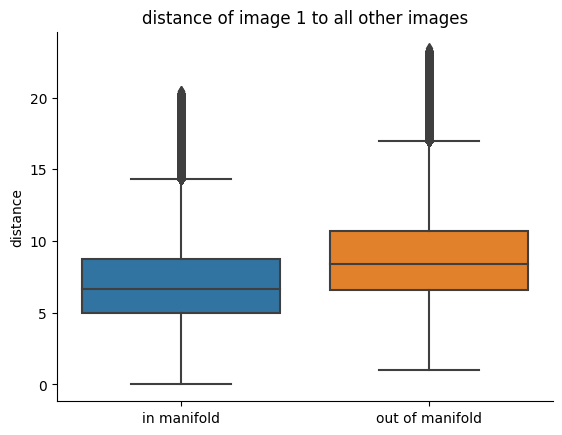

In [20]:
# lets find the cnn score of the mass of the encoded images form population_act_tensor

centr_of_mass = np.mean(population_act_tensor, axis=0)
# lets find the vector between the center of mass and each image
distances_list = list()
distances_list_out = list()
# get 1000 rand number from 0 to 50000
rand_num = np.random.randint(0, 50000, 100)

for image_id in rand_num:
    i1_cm = population_act_tensor[image_id] - centr_of_mass
    # let permute this vector 
    i1_cm_perm = np.random.permutation(i1_cm)
    # out of manifuld vector
    i1_out = population_act_tensor[image_id]  + i1_cm_perm

    # lets find distance of first image from all other images and the out of manifold point to all other images
    distances = np.linalg.norm(population_act_tensor - population_act_tensor[image_id], axis=1)
    distances_out = np.linalg.norm(population_act_tensor - i1_out, axis=1)
    distances_list.append(distances)
    distances_list_out.append(distances_out)

# concatenate the distances
distances = np.concatenate(distances_list)
distances_out = np.concatenate(distances_list_out)

# let box plot the distances to compare the in manifold and out of manifold distances
plt.figure()
sns.boxplot(data=[distances, distances_out])
plt.title("distance of image 1 to all other images")
plt.xticks([0, 1], ["in manifold", "out of manifold"])
# set y limit 
plt.ylabel("distance")
